In [22]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
import missingno as msno
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('elsec15-Table 1.csv', index_col=False)

/Users/rishab/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,0100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,0100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,0100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,0101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,0100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400


In [5]:
df.describe()

,STATE,IDCENSUS,CONUM,SCHLEV,YRDATA,V33,TOTALREV,TFEDREV,C14,C15,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
count,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.0,14376.000000,1.437600e+04,1.437600e+04,14376.000000,14376.000000,...,14376.000000,1.437600e+04,1.437600e+04,14376.000000,1.437600e+04,14376.000000,14376.000000,14376.000000,14376.000000,1.437600e+04
mean,26.801336,2.728090e+13,29838.158598,2.883139,15.0,3374.682526,4.546951e+04,3.708038e+03,915.914858,752.781093,...,7.318656,2.871850e+04,4.831726e+03,3936.853158,2.957606e+04,487.162354,553.761547,1335.636825,3710.651920,9.091542e+03
std,13.894331,1.389514e+13,14753.492121,1.271649,0.0,14419.737037,2.590623e+05,2.021328e+04,5972.748111,3619.184513,...,122.649299,1.841763e+05,2.652979e+04,20071.591744,1.894224e+05,3555.988118,6968.740454,10651.097318,20183.852905,3.261580e+04
min,1.000000,1.500100e+12,1001.000000,1.000000,15.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,15.000000,1.550327e+13,18063.000000,3.000000,15.0,305.000000,5.241500e+03,2.920000e+02,54.000000,0.000000,...,0.000000,8.400000e+01,0.000000e+00,5.000000,7.150000e+01,0.000000,0.000000,0.000000,0.000000,8.350000e+02
50%,27.000000,2.750320e+13,30063.000000,3.000000,15.0,979.500000,1.402300e+04,8.470000e+02,180.000000,118.000000,...,0.000000,4.034000e+03,0.000000e+00,410.000000,4.143500e+03,0.000000,0.000000,0.000000,0.000000,2.708500e+03
75%,38.000000,3.850053e+13,41009.000000,3.000000,15.0,2744.250000,3.791375e+04,2.433500e+03,545.250000,532.000000,...,0.000000,1.866350e+04,3.030000e+02,1845.000000,1.912600e+04,0.000000,0.000000,491.000000,626.250000,7.567500e+03
max,51.000000,5.150230e+13,56045.000000,7.000000,15.0,995192.000000,2.543738e+07,1.307783e+06,379531.000000,248209.000000,...,7753.000000,1.372802e+07,1.312286e+06,731854.000000,1.447108e+07,173300.000000,700000.000000,869643.000000,885058.000000,2.355662e+06


In [11]:
df.columns

Index(['STATE', 'IDCENSUS', 'NAME', 'CONUM', 'CSA', 'CBSA', 'SCHLEV', 'NCESID',
       'YRDATA', 'V33',
       ...
       'V32', '_19H', '_21F', '_31F', '_41F', '_61V', '_66V', 'W01', 'W31',
       'W61'],
      dtype='object', length=141)

In [15]:
df_rev_info = df[['STATE', 'YRDATA', 'TOTALREV', 'TFEDREV', 'TSTREV', 'TLOCREV' ]]

In [17]:
df_spend_info = df[['TCURELSC', 'TCURINST', 'TCURSSVC', 'TCUROTH']]

In [20]:
df_rev_info.head()

,TCURELSC,TCURINST,TCURSSVC,TCUROTH
0,72872,44085,23217,5570
1,269928,155668,99682,14578
2,9957,5249,3835,873
3,24232,14887,7494,1851
4,29133,16019,10822,2292


In [21]:
df_spend_info.head()

,TCURELSC,TCURINST,TCURSSVC,TCUROTH
0,72872,44085,23217,5570
1,269928,155668,99682,14578
2,9957,5249,3835,873
3,24232,14887,7494,1851
4,29133,16019,10822,2292


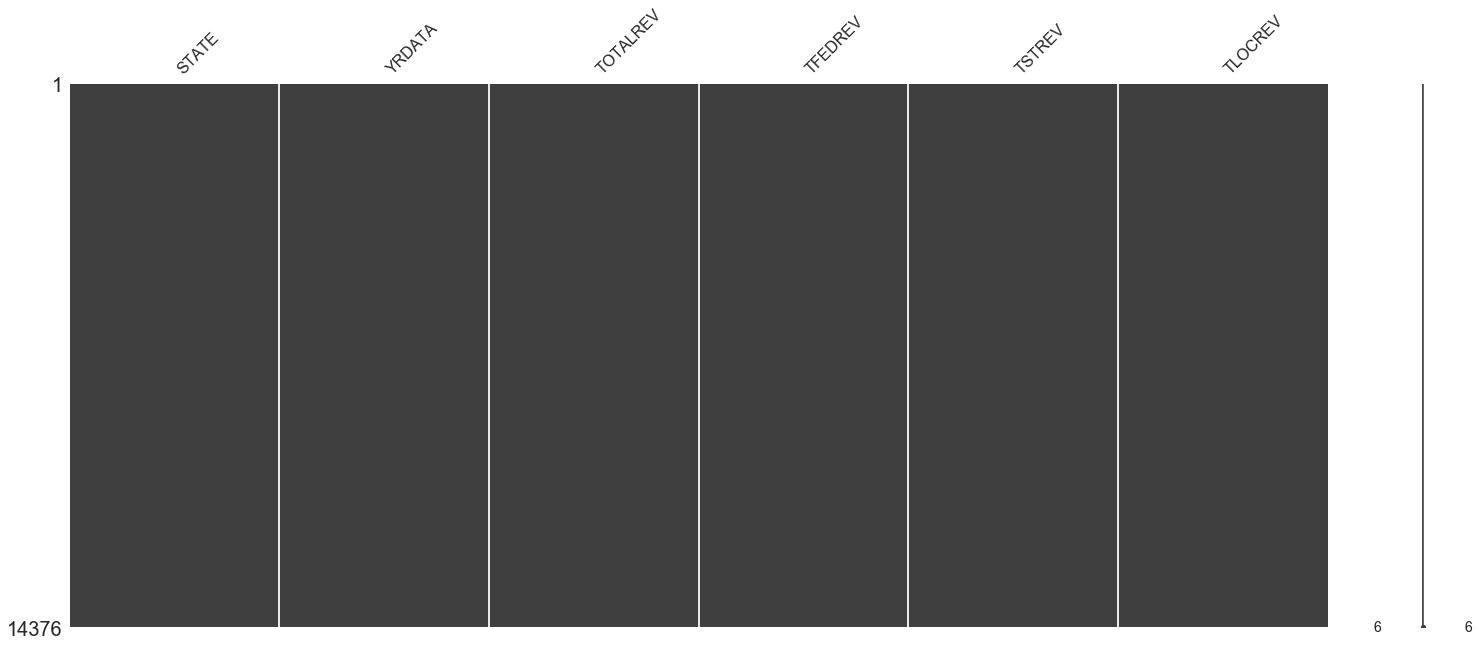

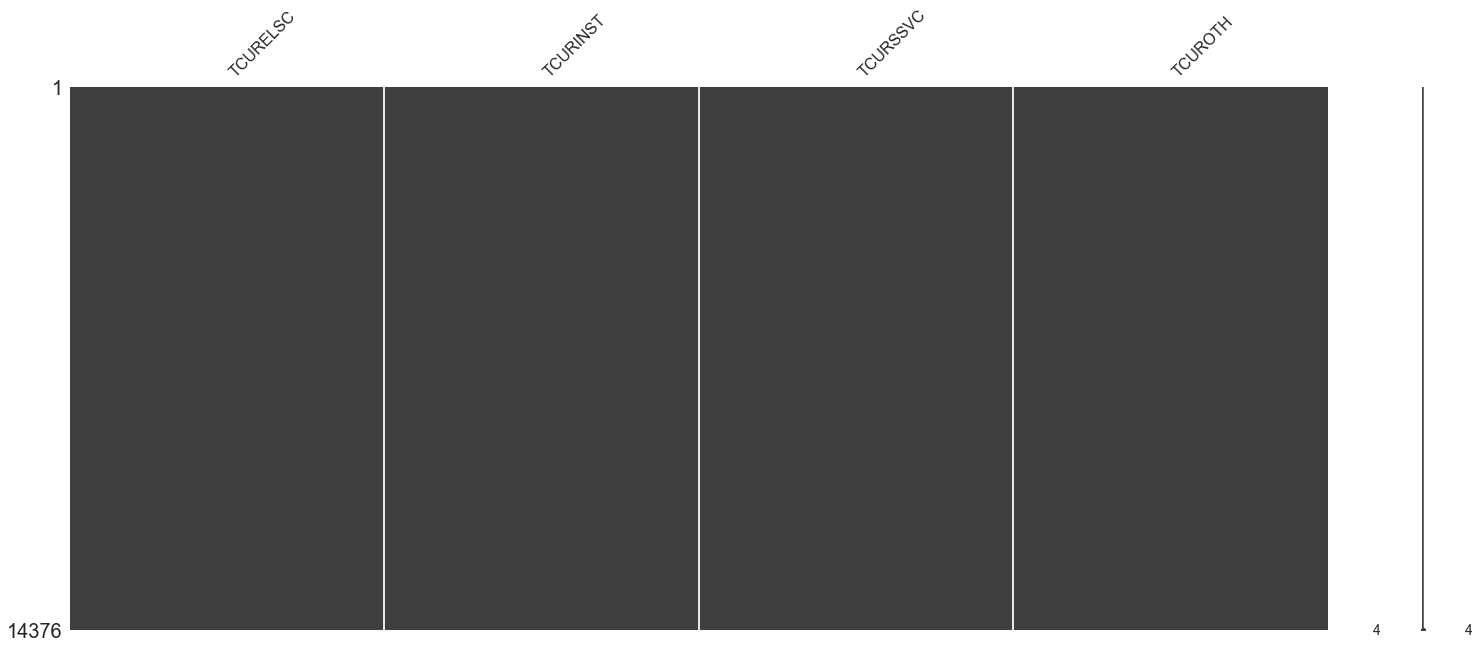

In [24]:
msno.matrix(df_rev_info)
msno.matrix(df_spend_info)

In [26]:
clean_revenue = df_rev_info.dropna()
clean_spending = df_spend_info.dropna()

In [30]:
clean_revenue.describe()
clean_spending.describe()

,TCURELSC,TCURINST,TCURSSVC,TCUROTH
count,1.437600e+04,1.437600e+04,1.437600e+04,14376.000000
mean,3.909932e+04,2.394922e+04,1.352417e+04,1625.927309
std,2.401800e+05,1.777658e+05,5.894857e+04,7558.732209
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.437000e+03,2.508750e+03,1.577000e+03,170.000000
50%,1.179900e+04,6.929000e+03,4.279500e+03,470.000000
75%,3.228275e+04,1.913625e+04,1.153675e+04,1250.000000
max,2.426924e+07,1.903582e+07,4.694906e+06,538505.000000


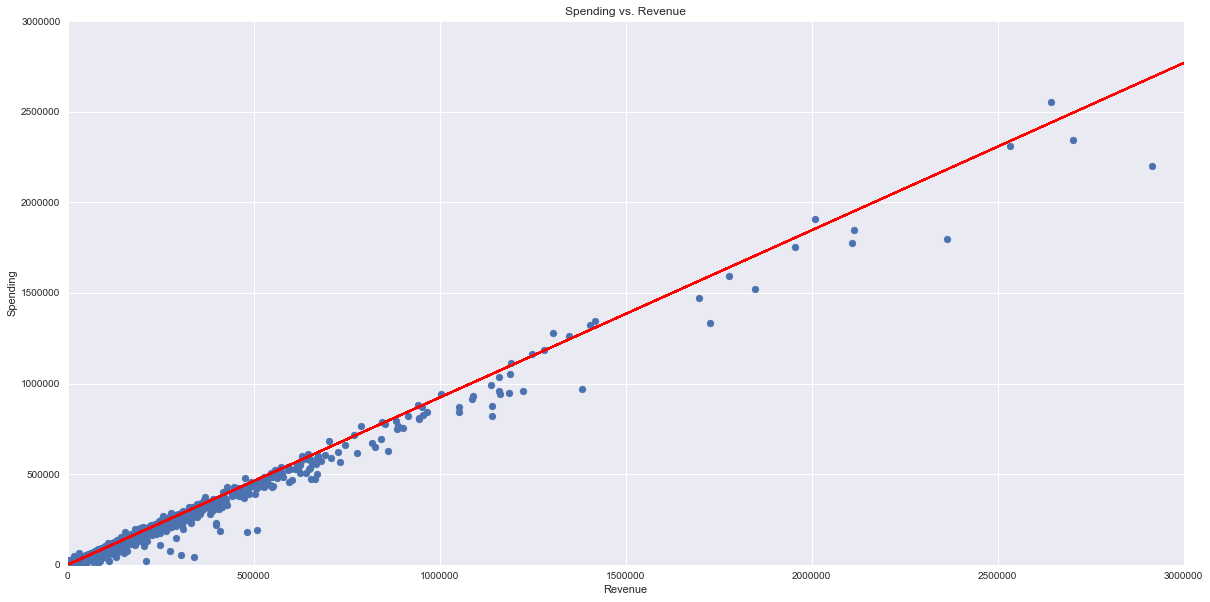

In [49]:
revenue = clean_revenue['TOTALREV']
spending = clean_spending['TCURELSC']
plt.figure(figsize=(20,10))
myOLS_exper = sm.OLS(spending,revenue).fit()
plt.plot(revenue, myOLS_exper.predict(revenue), color = 'red')
plt.scatter(revenue, spending)
plt.title("Spending vs. Revenue")
plt.xlabel("Revenue")
plt.xlim(0, 3*10e5)
plt.ylim(0, 3*10e5)
plt.ylabel("Spending")
plt.show()

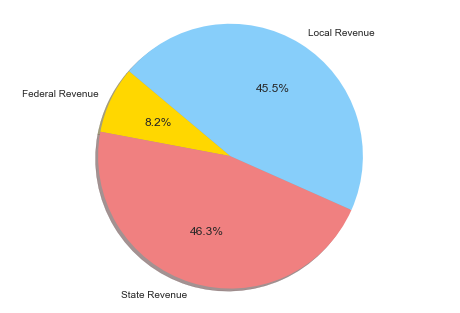

In [60]:
labels = 'Federal Revenue', 'State Revenue', 'Local Revenue'
sizes = [sum(clean_revenue['TFEDREV']), sum(clean_revenue['TSTREV']), sum(clean_revenue['TLOCREV'])]
colors = ['gold','lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()